<a href="https://colab.research.google.com/github/Sakshipingale13/DSBDA-Practical/blob/main/DSBDA_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Name: SAKSHI SONBA PINGALE
                    
  Roll No. : 49
                      
 ASSIGNMENT NO.- 4  ::Data Analytics I

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [ ]:
data=pd.read_csv("/content/train.csv")

1.Data Preprocessing

In [ ]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
data.describe() # basic stats

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
data.info() #  this method tells summary of dataset including the column names, data types, and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


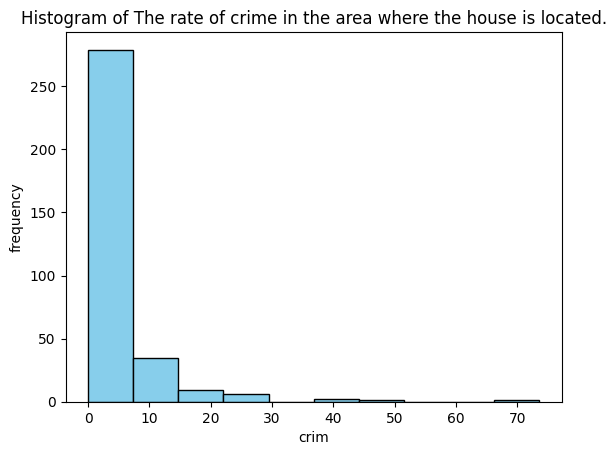

In [ ]:
plt.hist(data['crim'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('crim')
plt.ylabel('frequency')
plt.title('Histogram of The rate of crime in the area where the house is located.')
plt.show()

The majority of the areas have relatively low crime rates, as indicated by the higher frequency of bins on the left side of the histogram. However, there are some areas with higher crime rates, as shown by the presence of bars towards the right side of the histogram.

In [ ]:
# prepare a data for linear regression
# x=train=independent variables that will be used to predict the target variable.
# y=target=the variable we want to predict.
x=data[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat']]
y=data[['medv']]

In [ ]:
x.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [ ]:
print(y.head())

   medv
0  24.0
1  21.6
2  33.4
3  36.2
4  22.9


In [ ]:
print(x.shape)
y.shape

(333, 14)


(333, 1)

#**3.Create a Linear Model**

In [ ]:
# i) Model declaration
from sklearn.model_selection import train_test_split

In [ ]:
# ii)Split the data into training and testing sets
xTrain, xTest, yTrain, yTest= train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
 # Initialize the linear regression model
model = linear_model.LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(xTrain, yTrain)

LinearRegression()

In [ ]:
# Test the model
# The goal is to build a model that can accurately predict the target variable (y) based on the input features(x).
# The score() method tells us how well our linear regression model predicts the outcomes compared to the actual
# outcomes in our test data. 1=G,0=NG
score = model.score(xTest, yTest)
print(score)

0.6806406240350797


In [ ]:
y_pred=model.predict(xTest)
print(y_pred)

[[21.89392851]
 [ 9.60290347]
 [31.03458235]
 [18.49851938]
 [18.71484675]
 [34.60812132]
 [16.56463984]
 [34.09793132]
 [20.66454281]
 [45.06456303]
 [24.16907713]
 [23.1104301 ]
 [28.13277519]
 [15.20489518]
 [23.29001372]
 [24.09232701]
 [35.06524133]
 [35.0900592 ]
 [21.52506841]
 [26.15200975]
 [ 8.44716858]
 [28.91339873]
 [27.6736522 ]
 [22.41997155]
 [25.13206261]
 [11.10055806]
 [19.55464571]
 [21.80385926]
 [19.96195727]
 [26.51145541]
 [23.48129912]
 [19.91225947]
 [21.61202997]
 [13.90026926]
 [12.91739645]
 [33.33340776]
 [25.53034406]
 [28.30383308]
 [16.53472392]
 [36.58402847]
 [17.16428055]
 [21.91304337]
 [24.86689076]
 [23.25675527]
 [24.22129751]
 [19.33331598]
 [16.56673044]
 [22.08698647]
 [13.50618193]
 [21.88270327]
 [20.44620592]
 [17.30252361]
 [27.27735551]
 [10.39932026]
 [22.05073414]
 [27.19900144]
 [15.61513533]
 [21.02613189]
 [18.19719294]
 [11.56467223]
 [16.65514841]
 [24.96613043]
 [ 0.38209073]
 [34.4760159 ]
 [20.76925403]
 [23.00340827]
 [26.07816